# ETL archivo steam_games

### Importo los modulos de pandas,gzip y matplotlib necesarios para la limpieza de datos, para descomprimir el archivo json.gz y poder revisar algunas metricas iniciales a través de graficas.

In [2]:
import pandas as pd
import gzip,ast
import matplotlib.pyplot as plt

### Realizo la extracción y descompresión del archivo Json.gz y creo el DataFrame dfsteam_games.

In [3]:
with gzip.open('steam_games.json.gz','rt', encoding='utf-8') as f:
    for line in f:
        dfsteam_games=pd.read_json(f, lines=True)

### Compruebo la creación del DataFrame dfsteam_games y llamo sus primeros (10) registros con le metodo .head de pandas.

In [4]:
dfsteam_games.head(10)


,publisher,genres,app_name,title,url,release_date,tags,reviews_url,specs,price,early_access,id,developer
0,None,None,None,None,None,None,None,None,None,None,NaN,NaN,None
1,None,None,None,None,None,None,None,None,None,None,NaN,NaN,None
2,None,None,None,None,None,None,None,None,None,None,NaN,NaN,None
3,None,None,None,None,None,None,None,None,None,None,NaN,NaN,None
4,None,None,None,None,None,None,None,None,None,None,NaN,NaN,None
5,None,None,None,None,None,None,None,None,None,None,NaN,NaN,None
6,None,None,None,None,None,None,None,None,None,None,NaN,NaN,None
7,None,None,None,None,None,None,None,None,None,None,NaN,NaN,None
8,None,None,None,None,None,None,None,None,None,None,NaN,NaN,None
9,None,None,None,None,None,None,None,None,None,None,NaN,NaN,None


### Verifico las ultimos registros del dataframe con el metodo .tail de pandas. para poder ver la naturaleza de los registros, pues los primeros registros que llame con .head solo se puede observar datos Nulos (faltantes)

In [5]:
dfsteam_games.tail()

,publisher,genres,app_name,title,url,release_date,tags,reviews_url,specs,price,early_access,id,developer
120439,Ghost_RUS Games,"[Casual, Indie, Simulation, Strategy]",Colony On Mars,Colony On Mars,http://store.steampowered.com/app/773640/Colon...,2018-01-04,"[Strategy, Indie, Casual, Simulation]",http://steamcommunity.com/app/773640/reviews/?...,"[Single-player, Steam Achievements]",1.99,0.0,773640.0,"Nikita ""Ghost_RUS"""
120440,Sacada,"[Casual, Indie, Strategy]",LOGistICAL: South Africa,LOGistICAL: South Africa,http://store.steampowered.com/app/733530/LOGis...,2018-01-04,"[Strategy, Indie, Casual]",http://steamcommunity.com/app/733530/reviews/?...,"[Single-player, Steam Achievements, Steam Clou...",4.99,0.0,733530.0,Sacada
120441,Laush Studio,"[Indie, Racing, Simulation]",Russian Roads,Russian Roads,http://store.steampowered.com/app/610660/Russi...,2018-01-04,"[Indie, Simulation, Racing]",http://steamcommunity.com/app/610660/reviews/?...,"[Single-player, Steam Achievements, Steam Trad...",1.99,0.0,610660.0,Laush Dmitriy Sergeevich
120442,SIXNAILS,"[Casual, Indie]",EXIT 2 - Directions,EXIT 2 - Directions,http://store.steampowered.com/app/658870/EXIT_...,2017-09-02,"[Indie, Casual, Puzzle, Singleplayer, Atmosphe...",http://steamcommunity.com/app/658870/reviews/?...,"[Single-player, Steam Achievements, Steam Cloud]",4.99,0.0,658870.0,"xropi,stev3ns"
120443,None,None,Maze Run VR,None,http://store.steampowered.com/app/681550/Maze_...,None,"[Early Access, Adventure, Indie, Action, Simul...",http://steamcommunity.com/app/681550/reviews/?...,"[Single-player, Stats, Steam Leaderboards, HTC...",4.99,1.0,681550.0,None


### Verifico las caracteristicas : Longitud de dataframe, tipo de datos a través del metodo .info de pandas.

In [6]:
dfsteam_games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120444 entries, 0 to 120443
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   publisher     24083 non-null  object 
 1   genres        28852 non-null  object 
 2   app_name      32133 non-null  object 
 3   title         30085 non-null  object 
 4   url           32135 non-null  object 
 5   release_date  30068 non-null  object 
 6   tags          31972 non-null  object 
 7   reviews_url   32133 non-null  object 
 8   specs         31465 non-null  object 
 9   price         30758 non-null  object 
 10  early_access  32135 non-null  float64
 11  id            32133 non-null  float64
 12  developer     28836 non-null  object 
dtypes: float64(2), object(11)
memory usage: 11.9+ MB


### Observaciones.

#### 1. Se observa multiples registros faltantes en los diferentes campos, el numero de registros no es igual en cuanto a su longitud.
#### 2. El campo release_date es de tipo categorico , se debe realizar la transformación del dato a datatime, para posteriores consultas.
#### 3. El campo price es de tipo categorico , se debe realizar la transformación a tipo numerico(float 64), para posteriores consultas.

### Elimino los datos faltantes y reorganizo los indices.

In [7]:
dfsteam_games.dropna(inplace=True)
dfsteam_games.reset_index(drop=True, inplace=True)
print(dfsteam_games.index)


RangeIndex(start=0, stop=22530, step=1)


### Consulto nuevamente la información con el metodo .info de pandas

In [8]:
dfsteam_games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22530 entries, 0 to 22529
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   publisher     22530 non-null  object 
 1   genres        22530 non-null  object 
 2   app_name      22530 non-null  object 
 3   title         22530 non-null  object 
 4   url           22530 non-null  object 
 5   release_date  22530 non-null  object 
 6   tags          22530 non-null  object 
 7   reviews_url   22530 non-null  object 
 8   specs         22530 non-null  object 
 9   price         22530 non-null  object 
 10  early_access  22530 non-null  float64
 11  id            22530 non-null  float64
 12  developer     22530 non-null  object 
dtypes: float64(2), object(11)
memory usage: 2.2+ MB


### Se observa una reducción en cuanto al numero inicial de datos registrados 120444 a 22530, todos los campos quedan con 22530 registros no nulos. Lo que significa que ya no tenemos registros vacios o nulos. confirmo que los indices queden nuevamente desde 0 a 22529, llamando nuevamente la cabeza y la cola de dataframe

In [9]:
dfsteam_games.head()

,publisher,genres,app_name,title,url,release_date,tags,reviews_url,specs,price,early_access,id,developer
0,Kotoshiro,"[Action, Casual, Indie, Simulation, Strategy]",Lost Summoner Kitty,Lost Summoner Kitty,http://store.steampowered.com/app/761140/Lost_...,2018-01-04,"[Strategy, Action, Indie, Casual, Simulation]",http://steamcommunity.com/app/761140/reviews/?...,[Single-player],4.99,0.0,761140.0,Kotoshiro
1,"Making Fun, Inc.","[Free to Play, Indie, RPG, Strategy]",Ironbound,Ironbound,http://store.steampowered.com/app/643980/Ironb...,2018-01-04,"[Free to Play, Strategy, Indie, RPG, Card Game...",http://steamcommunity.com/app/643980/reviews/?...,"[Single-player, Multi-player, Online Multi-Pla...",Free To Play,0.0,643980.0,Secret Level SRL
2,Poolians.com,"[Casual, Free to Play, Indie, Simulation, Sports]",Real Pool 3D - Poolians,Real Pool 3D - Poolians,http://store.steampowered.com/app/670290/Real_...,2017-07-24,"[Free to Play, Simulation, Sports, Casual, Ind...",http://steamcommunity.com/app/670290/reviews/?...,"[Single-player, Multi-player, Online Multi-Pla...",Free to Play,0.0,670290.0,Poolians.com
3,彼岸领域,"[Action, Adventure, Casual]",弹炸人2222,弹炸人2222,http://store.steampowered.com/app/767400/2222/,2017-12-07,"[Action, Adventure, Casual]",http://steamcommunity.com/app/767400/reviews/?...,[Single-player],0.99,0.0,767400.0,彼岸领域
4,Trickjump Games Ltd,"[Action, Adventure, Simulation]",Battle Royale Trainer,Battle Royale Trainer,http://store.steampowered.com/app/772540/Battl...,2018-01-04,"[Action, Adventure, Simulation, FPS, Shooter, ...",http://steamcommunity.com/app/772540/reviews/?...,"[Single-player, Steam Achievements]",3.99,0.0,772540.0,Trickjump Games Ltd


In [10]:
dfsteam_games.tail()

,publisher,genres,app_name,title,url,release_date,tags,reviews_url,specs,price,early_access,id,developer
22525,Bidoniera Games,"[Action, Adventure, Casual, Indie]",Kebab it Up!,Kebab it Up!,http://store.steampowered.com/app/745400/Kebab...,2018-01-04,"[Action, Indie, Casual, Violent, Adventure]",http://steamcommunity.com/app/745400/reviews/?...,"[Single-player, Steam Achievements, Steam Cloud]",1.99,0.0,745400.0,Bidoniera Games
22526,Ghost_RUS Games,"[Casual, Indie, Simulation, Strategy]",Colony On Mars,Colony On Mars,http://store.steampowered.com/app/773640/Colon...,2018-01-04,"[Strategy, Indie, Casual, Simulation]",http://steamcommunity.com/app/773640/reviews/?...,"[Single-player, Steam Achievements]",1.99,0.0,773640.0,"Nikita ""Ghost_RUS"""
22527,Sacada,"[Casual, Indie, Strategy]",LOGistICAL: South Africa,LOGistICAL: South Africa,http://store.steampowered.com/app/733530/LOGis...,2018-01-04,"[Strategy, Indie, Casual]",http://steamcommunity.com/app/733530/reviews/?...,"[Single-player, Steam Achievements, Steam Clou...",4.99,0.0,733530.0,Sacada
22528,Laush Studio,"[Indie, Racing, Simulation]",Russian Roads,Russian Roads,http://store.steampowered.com/app/610660/Russi...,2018-01-04,"[Indie, Simulation, Racing]",http://steamcommunity.com/app/610660/reviews/?...,"[Single-player, Steam Achievements, Steam Trad...",1.99,0.0,610660.0,Laush Dmitriy Sergeevich
22529,SIXNAILS,"[Casual, Indie]",EXIT 2 - Directions,EXIT 2 - Directions,http://store.steampowered.com/app/658870/EXIT_...,2017-09-02,"[Indie, Casual, Puzzle, Singleplayer, Atmosphe...",http://steamcommunity.com/app/658870/reviews/?...,"[Single-player, Steam Achievements, Steam Cloud]",4.99,0.0,658870.0,"xropi,stev3ns"


### Realizo la transformación del tipo de dato de los campos release_date (datatime) y pirce (flota64)

In [11]:

dfsteam_games['release_date'] = pd.to_datetime(dfsteam_games['release_date'], errors='coerce' )

dfsteam_games['price'] = pd.to_numeric(dfsteam_games['price'], errors='coerce' )

### Confirmo el cambio revisando con el metodo .info de pandas .

In [12]:
dfsteam_games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22530 entries, 0 to 22529
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   publisher     22530 non-null  object        
 1   genres        22530 non-null  object        
 2   app_name      22530 non-null  object        
 3   title         22530 non-null  object        
 4   url           22530 non-null  object        
 5   release_date  22496 non-null  datetime64[ns]
 6   tags          22530 non-null  object        
 7   reviews_url   22530 non-null  object        
 8   specs         22530 non-null  object        
 9   price         21222 non-null  float64       
 10  early_access  22530 non-null  float64       
 11  id            22530 non-null  float64       
 12  developer     22530 non-null  object        
dtypes: datetime64[ns](1), float64(3), object(9)
memory usage: 2.2+ MB


### Se observa que el campo release_date sigue con valores nulos y el campo price. Realizo la eliminación de estos valores nulos, en los campos correspondientes

In [13]:
dfsteam_games.dropna(subset=['release_date'], inplace=True)
dfsteam_games.dropna(subset=['price'], inplace=True)


In [14]:
dfsteam_games.info()

<class 'pandas.core.frame.DataFrame'>
Index: 21194 entries, 0 to 22529
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   publisher     21194 non-null  object        
 1   genres        21194 non-null  object        
 2   app_name      21194 non-null  object        
 3   title         21194 non-null  object        
 4   url           21194 non-null  object        
 5   release_date  21194 non-null  datetime64[ns]
 6   tags          21194 non-null  object        
 7   reviews_url   21194 non-null  object        
 8   specs         21194 non-null  object        
 9   price         21194 non-null  float64       
 10  early_access  21194 non-null  float64       
 11  id            21194 non-null  float64       
 12  developer     21194 non-null  object        
dtypes: datetime64[ns](1), float64(3), object(9)
memory usage: 2.3+ MB


### Despues de la limpieza en los campos release_date y price se observa el dataframe con 21194 registros en todos sus campos no nulos y el tipo de dato correspondiente en cada uno de sus campos.

### Verifico que todos los registros dentro del campo release_date se han de tipo datatime

In [15]:

todos_datetime = pd.to_datetime(dfsteam_games['release_date'], errors='coerce').notna().all()

if todos_datetime:
    print("Todos los registros en 'release_date' son de tipo datetime.")
else:
    print("Al menos un registro en 'release_date' no es de tipo datetime.")


Todos los registros en 'release_date' son de tipo datetime.


### Verifico que todos los registros dentro del campo price se han de tipo numerico float

In [16]:
todos_price = pd.to_numeric(dfsteam_games['release_date'], errors='coerce').notna().all()

if todos_price:
    print("Todos los registros en 'price' son de tipo numerico flotante.")
else:
    print("Al menos un registro en 'price' no es de tipo numerico flotante.")

Todos los registros en 'price' son de tipo numerico flotante.


### Realizo el testing de consulta a traves de una grafica para verificar que no existan problemas dentro del dataframe dfstem_games y comprobar que la limpeza se realizo de manera correcta. grafico en barras el juego mas jugado por año.

/Users/jorgeandresgonzalezgomez/Library/Python/3.9/lib/python/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 26032 (\N{CJK UNIFIED IDEOGRAPH-65B0}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/jorgeandresgonzalezgomez/Library/Python/3.9/lib/python/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 20185 (\N{CJK UNIFIED IDEOGRAPH-4ED9}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/jorgeandresgonzalezgomez/Library/Python/3.9/lib/python/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 21073 (\N{CJK UNIFIED IDEOGRAPH-5251}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/jorgeandresgonzalezgomez/Library/Python/3.9/lib/python/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 22855 (\N{CJK UNIFIED IDEOGRAPH-5947}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/jorgeandresgonzalezgomez/Library/Python/3.9/lib/pytho

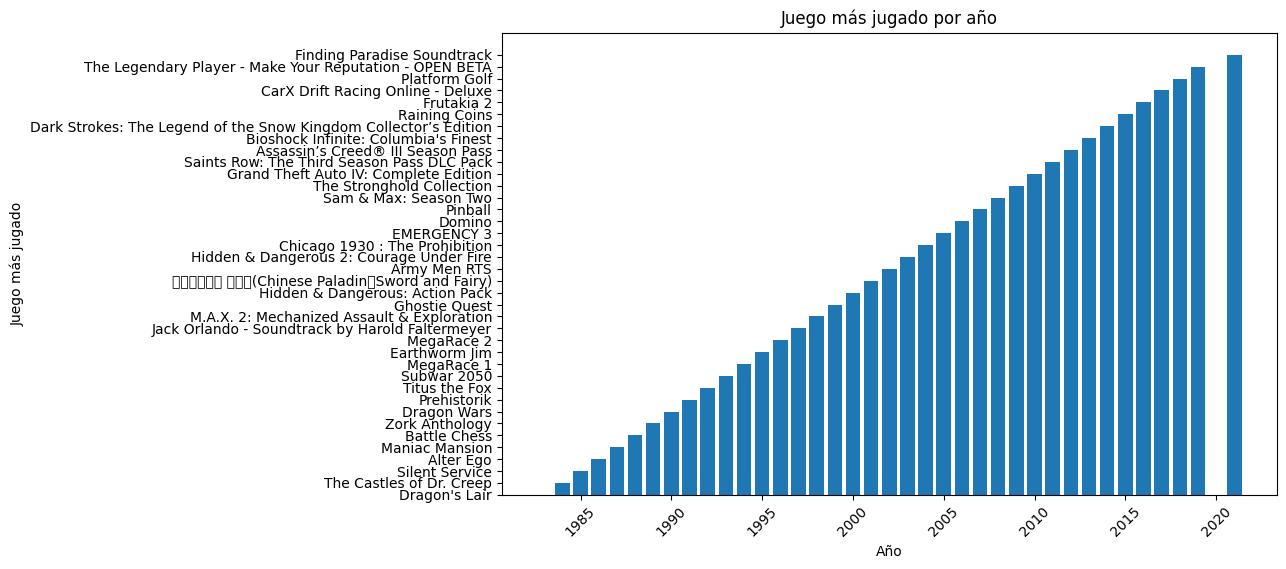

In [17]:

dfsteam_games['num_reviews'] = dfsteam_games['reviews_url'].str.extract(r'(\d+)').astype(float)

most_played_by_year = dfsteam_games.groupby(dfsteam_games['release_date'].dt.year)['num_reviews'].idxmax()
most_played_games = dfsteam_games.loc[most_played_by_year]

plt.figure(figsize=(10, 6))
plt.bar(most_played_games['release_date'].dt.year, most_played_games['app_name'])
plt.xlabel('Año')
plt.ylabel('Juego más jugado')
plt.title('Juego más jugado por año')
plt.xticks(rotation=45)
plt.show()


### Guardo el dataframe limpio en una archivo parquet

In [18]:
# Especifico la ruta y el nombre del archivo Parquet en la carpeta del proyecto
archivo_parquet = "steam_games.parquet"

# Guardo el DataFrame en un archivo Parquet en la carpeta del proyecto
dfsteam_games.to_parquet(archivo_parquet, index=False)